# Basic Logistic Regression

In [1]:
# Code segment no. 1 (put your comments for this code segment)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Code segment no. 2 (put your comments for this code segment)
import os
path = os.getcwd() + '\\data_logreg\\ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0, 0.5, 'Exam 2 Score')

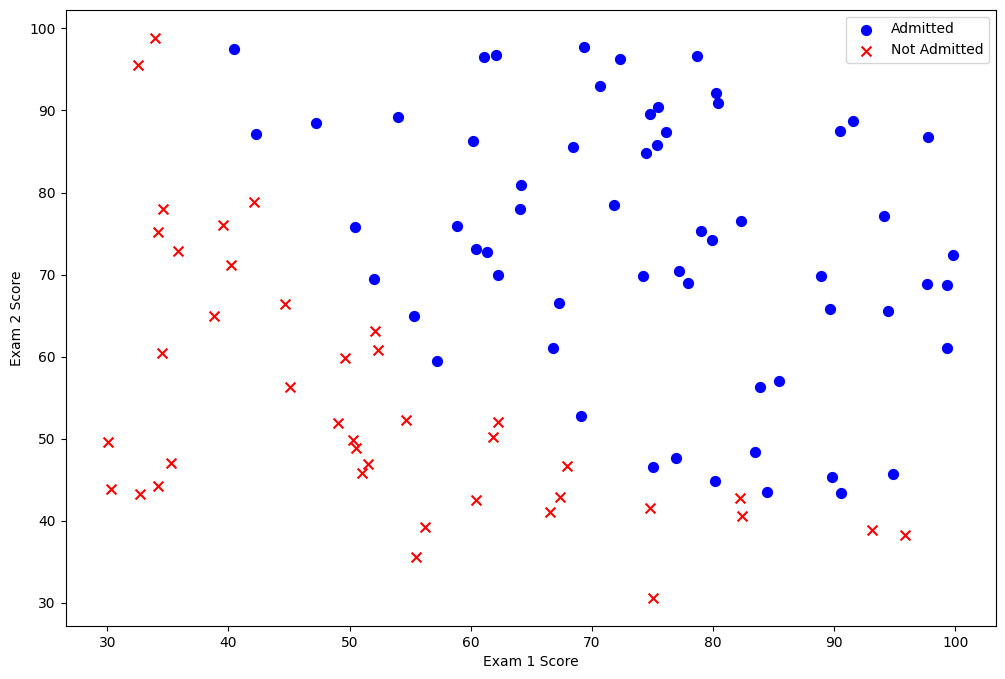

In [3]:
# Code segment no. 3 (put your comments for this code segment)
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')

In [4]:
# Code segment no. 4 (put your comments for this code segment)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

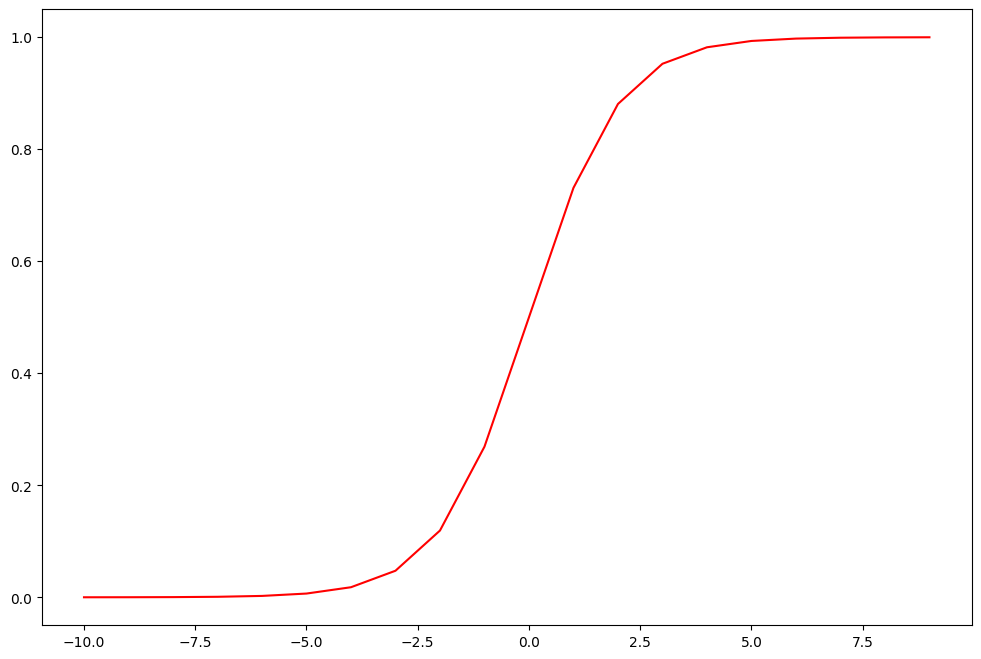

In [5]:
# Code segment no. 5 (put your comments for this code segment)
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

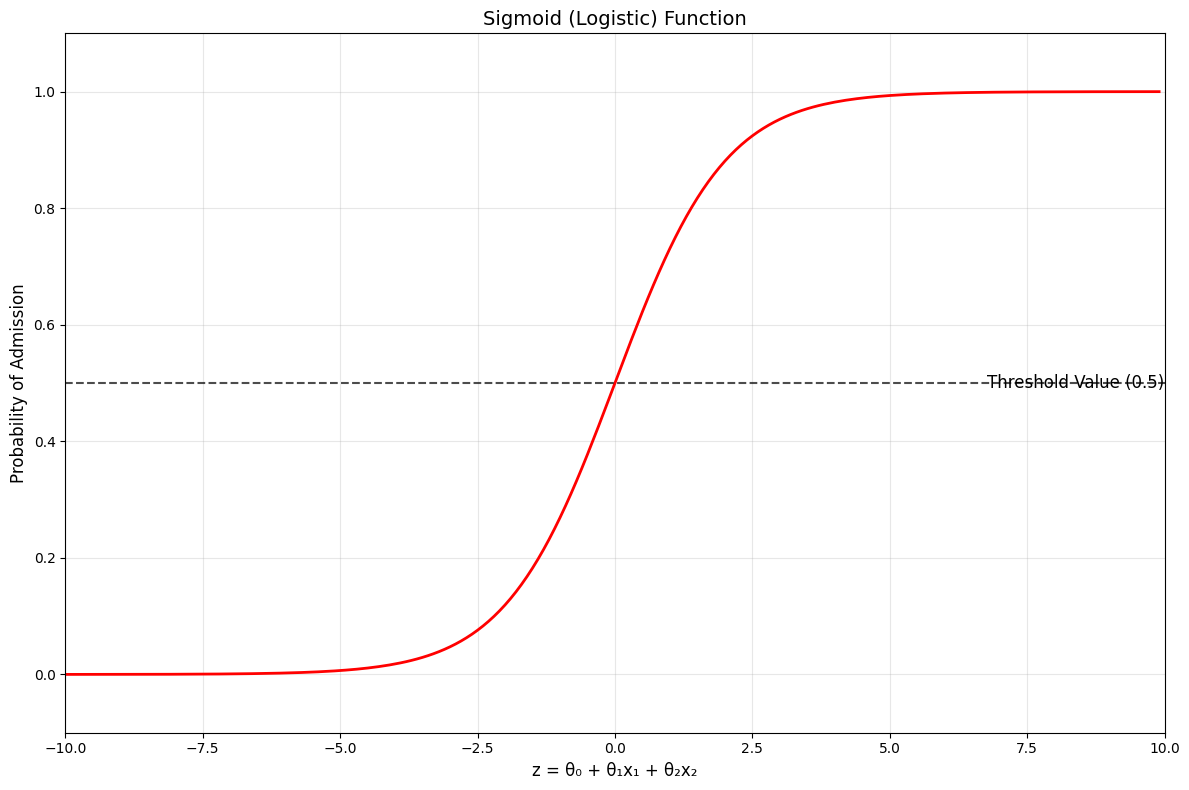

In [6]:
# Code segment no. 5A (enhanced visualization with real data points)

# Create a function to compute z values for our data points
def compute_z(X, theta):
    # Convert inputs to matrices to ensure correct operations
    X_matrix = np.matrix(X)
    theta_matrix = np.matrix(theta)
    # Calculate z = θᵀx
    return np.array(X_matrix * theta_matrix.T).flatten()

# Create figure
fig, ax1 = plt.subplots(figsize=(12,8))

# Plot 1: Standard sigmoid function
nums = np.arange(-10, 10, step=0.1)
ax1.plot(nums, sigmoid(nums), 'r', linewidth=2, label='Sigmoid Function')
ax1.axhline(y=0.5, color='k', linestyle='--', alpha=0.7)
ax1.text(10, 0.5, 'Threshold Value (0.5)', fontsize=12, va='center', ha='right')
ax1.grid(True, alpha=0.3)
ax1.set_xlim(-10, 10)
ax1.set_ylim(-0.1, 1.1)
ax1.set_title('Sigmoid (Logistic) Function', fontsize=14)
ax1.set_xlabel('z = θ₀ + θ₁x₁ + θ₂x₂', fontsize=12)
ax1.set_ylabel('Probability of Admission', fontsize=12)

plt.tight_layout()
plt.show()

In [7]:
# Code segment no. 6 (put your comments for this code segment)	
def cost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    return np.sum(first - second) / (len(X))

In [8]:
# Code segment no. 7 (put your comments for this code segment)	
# add a ones column - this makes the matrix multiplication work out easier
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

# convert to numpy arrays and initalize the parameter array theta
X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)

In [9]:
# Code segment no. 8 (put your comments for this code segment)
X.shape, theta.shape, y.shape

((100, 3), (3,), (100, 1))

In [10]:
# Code segment no. 9 (put your comments for this code segment)
cost(theta, X, y)

np.float64(0.6931471805599453)

In [11]:
# Code segment no. 10 (put your comments for this code segment)
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    return grad

In [12]:
# Code segment no. 11 (put your comments for this code segment)
gradient(theta, X, y)

array([ -0.1       , -12.00921659, -11.26284221])

In [13]:
# Code segment no. 12 (put your comments for this code segment)	
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y))
result	

(array([-25.16131865,   0.20623159,   0.20147149]), 36, 0)

In [14]:
# Code segment no. 13 (put your comments for this code segment)	
cost(result[0], X, y)

np.float64(0.20349770158947447)

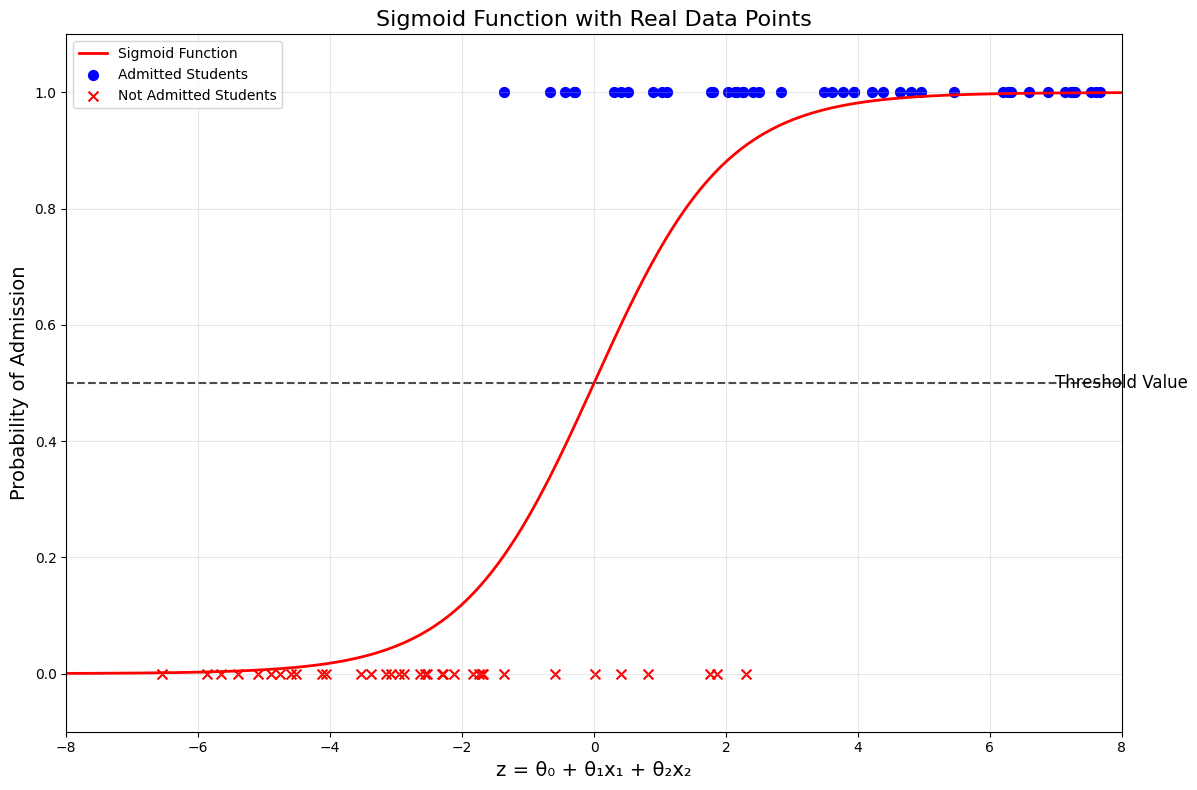

In [15]:
# Code segment 13A
# Compute z values for each data point using optimized theta
theta_opt = np.matrix(result[0])
z_values = compute_z(X, theta_opt)
predicted_probs = sigmoid(z_values)

# Create figure with real data points
plt.figure(figsize=(12, 8))

# Plot sigmoid function
z_range = np.linspace(-10, 10, 1000)
plt.plot(z_range, sigmoid(z_range), 'r-', linewidth=2, label='Sigmoid Function')

# Plot threshold line
plt.axhline(y=0.5, color='k', linestyle='--', alpha=0.7)
plt.text(9, 0.5, 'Threshold Value', fontsize=12, va='center', ha='right')

# Plot the real data points
admitted = y.flatten() == 1
not_admitted = y.flatten() == 0

# Transform to the sigmoid space - scatter points based on z-value and actual class
plt.scatter(z_values[admitted], np.ones(sum(admitted)), 
            c='b', marker='o', s=50, label='Admitted Students')
plt.scatter(z_values[not_admitted], np.zeros(sum(not_admitted)), 
            c='r', marker='x', s=50, label='Not Admitted Students')

# Set labels and title
plt.xlabel('z = θ₀ + θ₁x₁ + θ₂x₂', fontsize=14)
plt.ylabel('Probability of Admission', fontsize=14)
plt.title('Sigmoid Function with Real Data Points', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(loc='best')
plt.xlim(-8, 8)
plt.ylim(-0.1, 1.1)

plt.tight_layout()
plt.show()

In [16]:
# Code segment no. 14 (put your comments for this code segment)
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [17]:
# Code segment no. 15 (put your comments for this code segment)	
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 89%


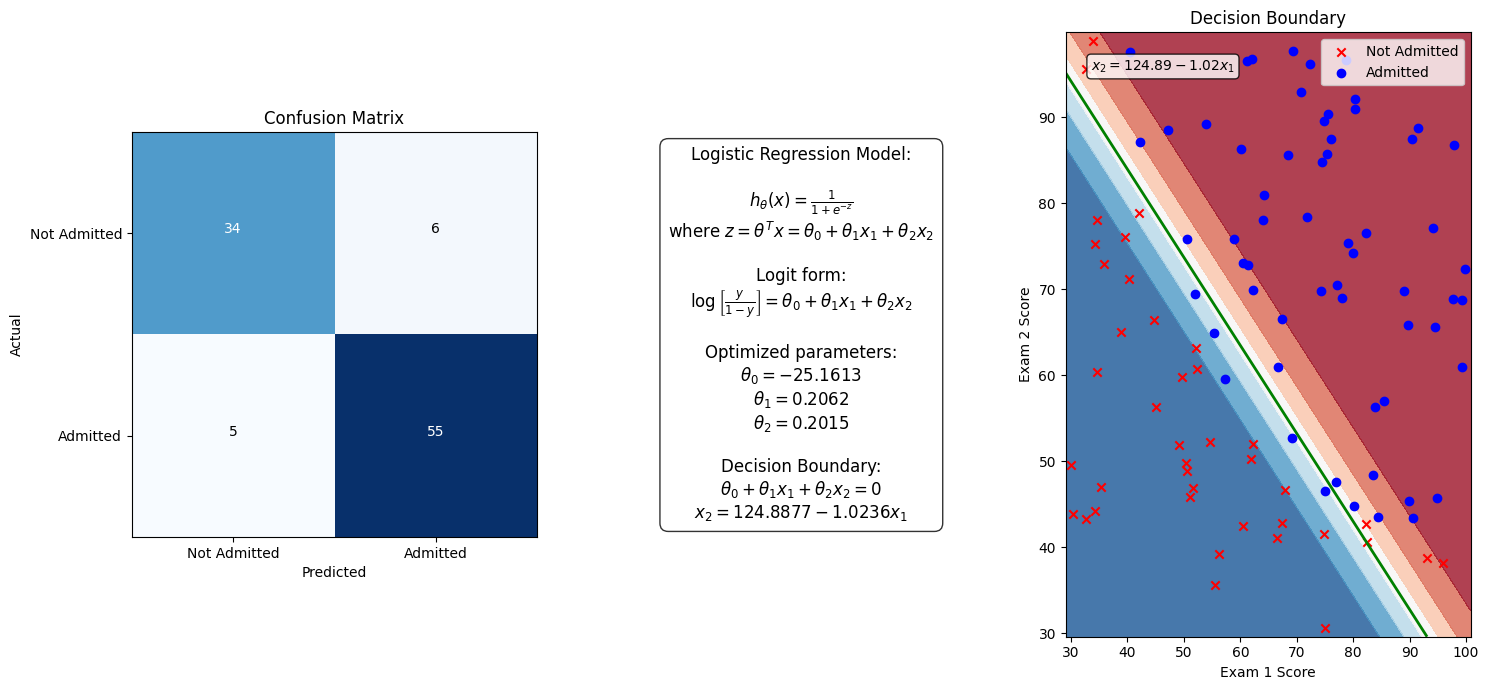


--- Model Evaluation Metrics ---
Accuracy:  0.8900
Precision: 0.9016
Recall:    0.9167
F1 Score:  0.9091

Optimized Parameters (θ):
θ₀ (Intercept): -25.161319
θ₁ (Exam 1):    0.206232
θ₂ (Exam 2):    0.201471

Logistic Regression Model:
h_θ(x) = 1 / (1 + e^(-z))
where z = θᵀx = θ₀ + θ₁x₁ + θ₂x₂

Logit form:
log[y/(1-y)] = θ₀ + θ₁x₁ + θ₂x₂

Decision Boundary:
θ₀ + θ₁x₁ + θ₂x₂ = 0
x₂ = 124.887740 - 1.023627x₁


In [18]:
# Code segment no. 15A (enhanced model evaluation metrics with formula)
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.patches as mpatches

# Get model predictions
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)

# Convert predictions and actual values to numpy arrays for easier handling
y_true = y.flatten()
y_pred = np.array(predictions)

# Calculate metrics manually
TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# Create and display a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Create plot for visualization with 3 subplots
plt.figure(figsize=(15, 7))

# Plot confusion matrix
plt.subplot(1, 3, 1)
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Admitted', 'Admitted'])
plt.yticks(tick_marks, ['Not Admitted', 'Admitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add text annotations to confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

# Plot the logistic regression formula
plt.subplot(1, 3, 2)
plt.axis('off')  # Turn off the axis

# Create text for the formula with both sigmoid and logit forms
formula_text = (
    r"Logistic Regression Model:" + "\n\n" +
    r"$h_\theta(x) = \frac{1}{1 + e^{-z}}$" + "\n" +
    r"where $z = \theta^T x = \theta_0 + \theta_1 x_1 + \theta_2 x_2$" + "\n\n" +
    r"Logit form:" + "\n" +
    r"$\log\left[\frac{y}{1-y}\right] = \theta_0 + \theta_1 x_1 + \theta_2 x_2$" + "\n\n" +
    r"Optimized parameters:" + "\n" +
    r"$\theta_0 = " + f"{theta_min[0, 0]:.4f}" + "$" + "\n" +
    r"$\theta_1 = " + f"{theta_min[0, 1]:.4f}" + "$" + "\n" +
    r"$\theta_2 = " + f"{theta_min[0, 2]:.4f}" + "$" + "\n\n" +
    r"Decision Boundary:" + "\n" +
    r"$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$" + "\n" +
    r"$x_2 = " + f"{-theta_min[0, 0]/theta_min[0, 2]:.4f}" + 
    f" - {theta_min[0, 1]/theta_min[0, 2]:.4f}" + " x_1$"
)

# Add the formula text to the plot
plt.text(0.5, 0.5, formula_text, fontsize=12, 
         ha='center', va='center',
         bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Plot sigmoid function with decision boundary
plt.subplot(1, 3, 3)
# Create a meshgrid to visualize the decision boundary
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Evaluate the model on the grid
Z = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        Z[i, j] = sigmoid(np.matrix([1, xx[i, j], yy[i, j]]) * theta_min.T).item()

# Plot the contour and training examples
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu_r)
plt.scatter(X[y_true == 0, 1], X[y_true == 0, 2], c='red', marker='x', label='Not Admitted')
plt.scatter(X[y_true == 1, 1], X[y_true == 1, 2], c='blue', marker='o', label='Admitted')
plt.contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='green')
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.title('Decision Boundary')
plt.legend()

# Add an annotation showing the decision boundary equation
x_pos = X[:, 1].min() + (X[:, 1].max() - X[:, 1].min()) * 0.05
y_pos = X[:, 2].min() + (X[:, 2].max() - X[:, 2].min()) * 0.95
boundary_eq = f"$x_2 = {-theta_min[0, 0]/theta_min[0, 2]:.2f} - {theta_min[0, 1]/theta_min[0, 2]:.2f}x_1$"
plt.annotate(boundary_eq, xy=(x_pos, y_pos), xytext=(x_pos, y_pos),
             bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", alpha=0.8))

plt.tight_layout()
plt.show()

# Print all metrics in a formatted way
print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Display optimized theta values
print("\nOptimized Parameters (θ):")
print(f"θ₀ (Intercept): {theta_min[0, 0]:.6f}")
print(f"θ₁ (Exam 1):    {theta_min[0, 1]:.6f}")
print(f"θ₂ (Exam 2):    {theta_min[0, 2]:.6f}")

# Display the logistic regression formula in text format
print("\nLogistic Regression Model:")
print(f"h_θ(x) = 1 / (1 + e^(-z))")
print(f"where z = θᵀx = θ₀ + θ₁x₁ + θ₂x₂")
print("\nLogit form:")
print(f"log[y/(1-y)] = θ₀ + θ₁x₁ + θ₂x₂")

# Display the decision boundary equation
print("\nDecision Boundary:")
print(f"θ₀ + θ₁x₁ + θ₂x₂ = 0")
print(f"x₂ = {-theta_min[0, 0]/theta_min[0, 2]:.6f} - {theta_min[0, 1]/theta_min[0, 2]:.6f}x₁")

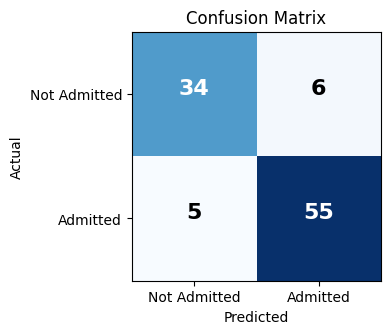


--- Model Evaluation Metrics ---
Accuracy:  0.8900
Precision: 0.9016
Recall:    0.9167
F1 Score:  0.9091

Optimized Parameters (θ):
θ₀ (Intercept): -25.161319
θ₁ (Exam 1):    0.206232
θ₂ (Exam 2):    0.201471


In [19]:
# Code segment no. 15B (enhanced model evaluation metrics with formula)
from sklearn.metrics import confusion_matrix

# Get model predictions
theta_min = np.matrix(result[0])
predictions = predict(theta_min, X)

# Convert predictions and actual values to numpy arrays for easier handling
y_true = y.flatten()
y_pred = np.array(predictions)

# Calculate metrics manually
TP = np.sum((y_true == 1) & (y_pred == 1))
TN = np.sum((y_true == 0) & (y_pred == 0))
FP = np.sum((y_true == 0) & (y_pred == 1))
FN = np.sum((y_true == 1) & (y_pred == 0))
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# Create and display a confusion matrix and create plot for visualization
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4, 4))

# Plot confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
tick_marks = [0, 1]
plt.xticks(tick_marks, ['Not Admitted', 'Admitted'])
plt.yticks(tick_marks, ['Not Admitted', 'Admitted'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Add text annotations to confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center", fontsize=16, fontweight='bold',
                color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Print all metrics in a formatted way
print("\n--- Model Evaluation Metrics ---")
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Display optimized theta values
print("\nOptimized Parameters (θ):")
print(f"θ₀ (Intercept): {theta_min[0, 0]:.6f}")
print(f"θ₁ (Exam 1):    {theta_min[0, 1]:.6f}")
print(f"θ₂ (Exam 2):    {theta_min[0, 2]:.6f}")

# Regularized logistic regression

In [20]:
# Code segment no. 16 (put your comments for this code segment)
import os
path = os.getcwd() + '\\data_logreg\\ex2data2.txt'
data2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
data2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Text(0, 0.5, 'Test 2 Score')

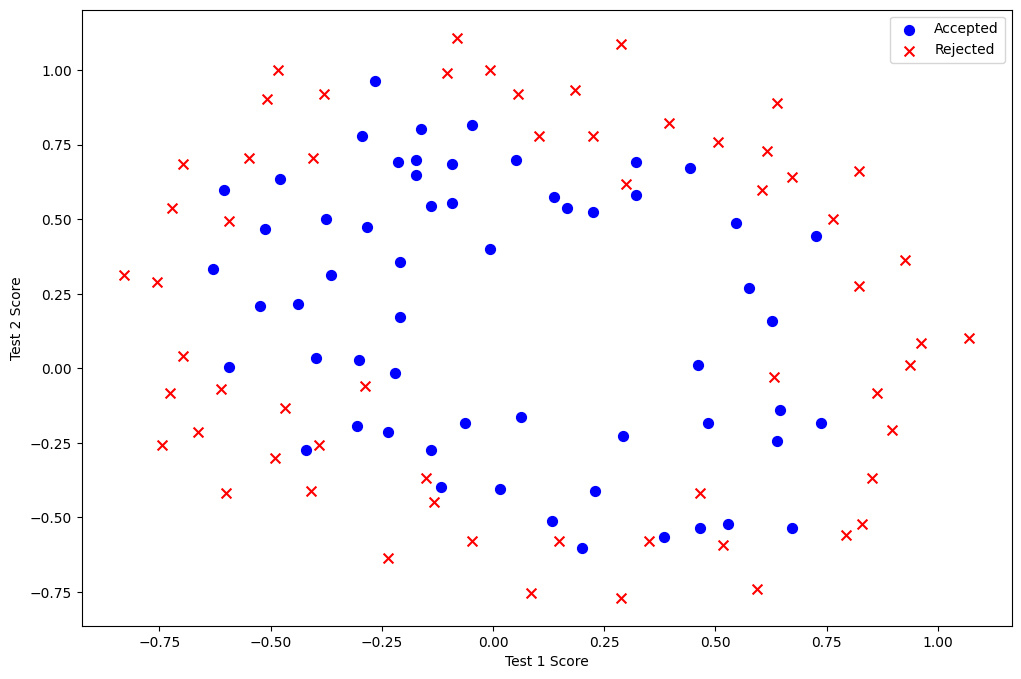

In [21]:
# Code segment no. 17 (put your comments for this code segment)
positive = data2[data2['Accepted'].isin([1])]
negative = data2[data2['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Test 1'], positive['Test 2'], s=50, c='b', marker='o', label='Accepted')
ax.scatter(negative['Test 1'], negative['Test 2'], s=50, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')

In [22]:
# Code segment no. 18 (put your comments for this code segment)
degree = 5
x1 = data2['Test 1']
x2 = data2['Test 2']

data2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        data2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

data2.drop('Test 1', axis=1, inplace=True)
data2.drop('Test 2', axis=1, inplace=True)

data2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


In [23]:
# Code segment no. 19 (put your comments for this code segment)	
def costReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    return np.sum(first - second) / (len(X)) + reg

In [24]:
# Code segment no. 20 (put your comments for this code segment)	
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta[:,i])
    
    return grad

In [25]:
# Code segment no. 20A (fixed)	
def gradientReg(theta, X, y, learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        
        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            # Extract the scalar value using item()
            theta_value = theta[:,i].item()
            grad[i] = (np.sum(term) / len(X)) + ((learningRate / len(X)) * theta_value)
    
    return grad

In [26]:
# Code segment no. 21 (put your comments for this code segment)	
# set X and y (remember from above that we moved the label to column 0)
cols = data2.shape[1]
X2 = data2.iloc[:,1:cols]
y2 = data2.iloc[:,0:1]

# convert to numpy arrays and initalize the parameter array theta
X2 = np.array(X2.values)
y2 = np.array(y2.values)
theta2 = np.zeros(11)

In [27]:
# Code segment no. 22 (put your comments for this code segment)	
learningRate = 1

In [28]:
# Code segment no. 23 (put your comments for this code segment)
costReg(theta2, X2, y2, learningRate)

np.float64(0.6931471805599454)

In [29]:
# Code segment no. 24 (put your comments for this code segment)
gradientReg(theta2, X2, y2, learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [30]:
# Code segment no. 25 (put your comments for this code segment)
result2 = opt.fmin_tnc(func=costReg, x0=theta2, fprime=gradientReg, args=(X2, y2, learningRate))
result2

(array([ 1.22702480e-04,  7.19893533e-05, -3.74156020e-04, -1.44256518e-04,
         2.93168594e-05, -5.64160697e-05, -1.02826715e-04, -2.83150640e-04,
         6.47460472e-07, -1.99697745e-04, -1.68479401e-05]),
 97,
 1)

In [31]:
# Code segment no. 26 (put your comments for this code segment)
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {0}%'.format(accuracy))

accuracy = 77%


In [32]:
# Code segment no. 27 (put your comments for this code segment)
from sklearn import linear_model
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, y2.ravel())

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [33]:
# Code segment no. 28 (put your comments for this code segment)
model.score(X2, y2)

0.6610169491525424

Available columns in data2: ['Accepted', 'Ones', 'F10', 'F20', 'F21', 'F30', 'F31', 'F32', 'F40', 'F41', 'F42', 'F43']
Using features: Ones and F10 for visualization
Shape of y_true: (118,)
Shape of custom_proba: (118,)


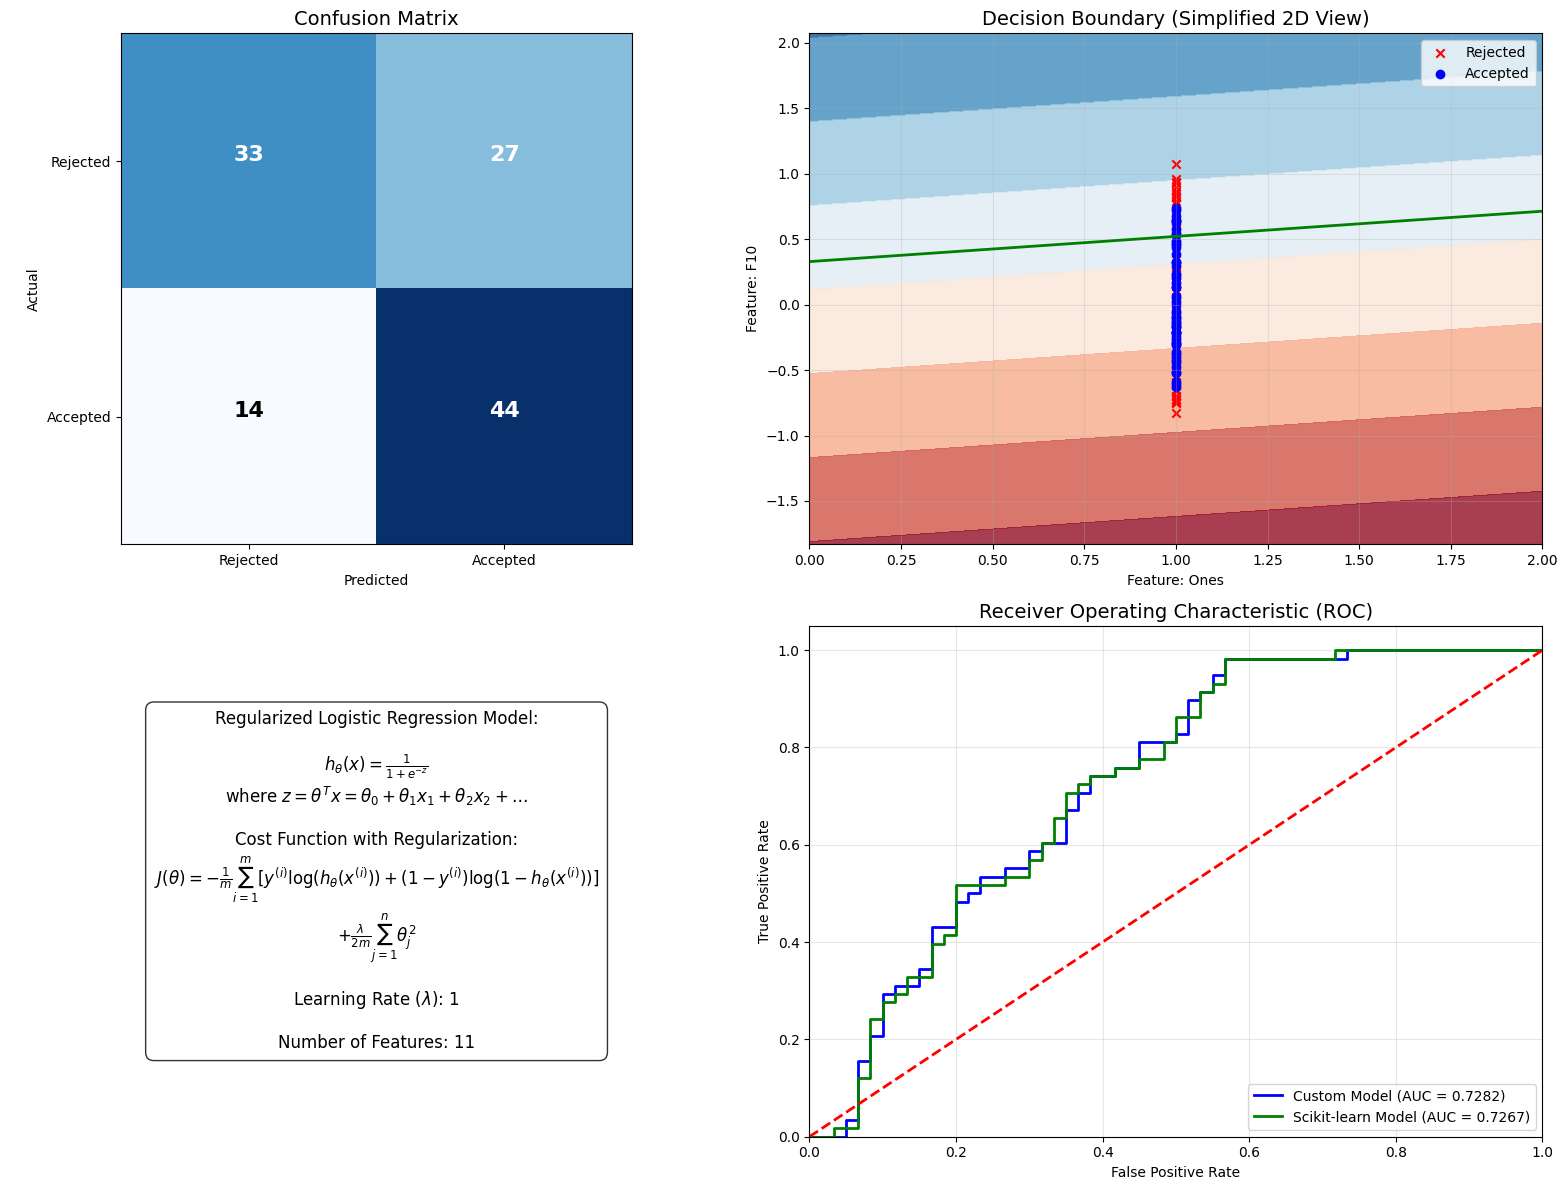


--- Regularized Logistic Regression Metrics ---
                Custom Model  |  Scikit-learn Model
Accuracy:        0.6525      |  0.6610
Precision:       0.6197      |  0.6197
Recall:          0.7586      |  0.7586
F1 Score:        0.6822      |  0.6822
AUC:             0.7282      |  0.7267

--- Regularization Effect ---
• Learning Rate (λ): 1
• Number of polynomial features: 11
• Effect of regularization: Prevents overfitting by penalizing large parameter values

--- Top 5 Important Features ---
Feature 2: 1.602295
Feature 7: 1.374219
Feature 9: 0.952453
Feature 3: 0.586700
Feature 6: 0.394635


In [34]:
# Code segment no. 28A (enhanced metrics for regularized logistic regression)
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.patches as mpatches

# Get predictions from both your custom model and scikit-learn model
theta_min = np.matrix(result2[0])
custom_predictions = predict(theta_min, X2)
sklearn_predictions = model.predict(X2)
sklearn_proba = model.predict_proba(X2)[:, 1]

# Convert to numpy arrays for easier handling
y_true = y2.flatten()
custom_pred = np.array(custom_predictions)

# Calculate metrics for custom model
TP = np.sum((y_true == 1) & (custom_pred == 1))
TN = np.sum((y_true == 0) & (custom_pred == 0))
FP = np.sum((y_true == 0) & (custom_pred == 1))
FN = np.sum((y_true == 1) & (custom_pred == 0))

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# Create confusion matrix
cm = confusion_matrix(y_true, custom_pred)

# Create visualization with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Confusion Matrix
axes[0, 0].imshow(cm, cmap=plt.cm.Blues)
axes[0, 0].set_title('Confusion Matrix', fontsize=14)
tick_marks = [0, 1]
axes[0, 0].set_xticks(tick_marks)
axes[0, 0].set_xticklabels(['Rejected', 'Accepted'])
axes[0, 0].set_yticks(tick_marks)
axes[0, 0].set_yticklabels(['Rejected', 'Accepted'])
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

# Add text annotations to confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes[0, 0].text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center", fontsize=16, fontweight='bold',
                color="white" if cm[i, j] > thresh else "black")

# Fix for the decision boundary visualization in code segment 28A

# First, let's check what columns actually exist in your DataFrame
print("Available columns in data2:", data2.columns.tolist())

# Plot 2: Decision Boundary visualization
# Let's use the first two feature columns (after 'Ones') regardless of their names
feature_columns = data2.columns.tolist()
# Skip the 'Accepted' column (at index 0) and 'Ones' column
first_feature = feature_columns[1]  # First feature column after 'Ones'
second_feature = feature_columns[2]  # Second feature column after 'Ones'

print(f"Using features: {first_feature} and {second_feature} for visualization")

# Create a meshgrid for the decision boundary
x_min, x_max = data2[first_feature].min() - 1, data2[first_feature].max() + 1
y_min, y_max = data2[second_feature].min() - 1, data2[second_feature].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# We'll use just the first two feature dimensions for visualization
# This is a simplification since the actual model uses more features
Z = np.zeros((xx.shape[0], xx.shape[1]))
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        # Create feature vector (using zeros for higher-order features)
        features = np.zeros(11)
        features[0] = 1  # Ones
        features[1] = xx[i, j]  # First feature
        features[2] = yy[i, j]  # Second feature
        Z[i, j] = sigmoid(np.matrix(features) * theta_min.T).item()

# Plot the decision boundary
axes[0, 1].contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu_r)
axes[0, 1].scatter(data2[first_feature][y_true == 0], data2[second_feature][y_true == 0], 
                  c='red', marker='x', label='Rejected')
axes[0, 1].scatter(data2[first_feature][y_true == 1], data2[second_feature][y_true == 1], 
                  c='blue', marker='o', label='Accepted')
axes[0, 1].contour(xx, yy, Z, levels=[0.5], linewidths=2, colors='green')
axes[0, 1].set_xlabel(f'Feature: {first_feature}')
axes[0, 1].set_ylabel(f'Feature: {second_feature}')
axes[0, 1].set_title('Decision Boundary (Simplified 2D View)', fontsize=14)
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Regularized Logistic Regression Formula
axes[1, 0].axis('off')
formula_text = (
    r"Regularized Logistic Regression Model:" + "\n\n" +
    r"$h_\theta(x) = \frac{1}{1 + e^{-z}}$" + "\n" +
    r"where $z = \theta^T x = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots$" + "\n\n" +
    r"Cost Function with Regularization:" + "\n" +
    r"$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))]$" + "\n" +
    r"$+ \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_j^2$" + "\n\n" +
    r"Learning Rate ($\lambda$): " + f"{learningRate}" + "\n\n" +
    r"Number of Features: " + f"{X2.shape[1]}"
)
axes[1, 0].text(0.5, 0.5, formula_text, fontsize=12,
               ha='center', va='center',
               bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'))

# Plot 4: ROC Curve comparing custom model vs sklearn model
# Fixed ROC curve calculation for code segment 28A

# Calculate ROC curve data - Fix the matrix multiplication
# The issue is in this line:
# custom_proba = sigmoid(X2 @ theta_min.T).flatten()
# Let's use the proper matrix multiplication:

# Convert to matrices
X2_matrix = np.matrix(X2)
theta_min_matrix = np.matrix(theta_min)

# Calculate probabilities properly
custom_proba = sigmoid(X2_matrix * theta_min_matrix.T)
custom_proba = np.array(custom_proba).flatten()  # Convert to 1D array

# Now the dimensions should match
print(f"Shape of y_true: {y_true.shape}")
print(f"Shape of custom_proba: {custom_proba.shape}")

# Calculate ROC curves (should work now)
fpr_custom, tpr_custom, _ = roc_curve(y_true, custom_proba)
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_true, sklearn_proba)
roc_auc_custom = auc(fpr_custom, tpr_custom)
roc_auc_sklearn = auc(fpr_sklearn, tpr_sklearn)

# Plot ROC curves
axes[1, 1].plot(fpr_custom, tpr_custom, color='blue', lw=2, 
               label=f'Custom Model (AUC = {roc_auc_custom:.4f})')
axes[1, 1].plot(fpr_sklearn, tpr_sklearn, color='green', lw=2, 
               label=f'Scikit-learn Model (AUC = {roc_auc_sklearn:.4f})')
axes[1, 1].plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
axes[1, 1].set_xlim([0.0, 1.0])
axes[1, 1].set_ylim([0.0, 1.05])
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title('Receiver Operating Characteristic (ROC)', fontsize=14)
axes[1, 1].legend(loc="lower right")
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print comparison of metrics
print("\n--- Regularized Logistic Regression Metrics ---")
print("                Custom Model  |  Scikit-learn Model")
print(f"Accuracy:        {accuracy:.4f}      |  {model.score(X2, y2):.4f}")
print(f"Precision:       {precision:.4f}      |  {TP/(TP+FP):.4f}")
print(f"Recall:          {recall:.4f}      |  {TP/(TP+FN):.4f}")
print(f"F1 Score:        {f1:.4f}      |  {2*precision*recall/(precision+recall) if (precision+recall) > 0 else 0:.4f}")
print(f"AUC:             {roc_auc_custom:.4f}      |  {roc_auc_sklearn:.4f}")

print("\n--- Regularization Effect ---")
print(f"• Learning Rate (λ): {learningRate}")
print(f"• Number of polynomial features: {X2.shape[1]}")
print(f"• Effect of regularization: Prevents overfitting by penalizing large parameter values")

# Display top 5 feature importance from scikit-learn model
if hasattr(model, 'coef_'):
    feature_importance = np.abs(model.coef_[0])
    feature_names = [f'Feature {i}' for i in range(X2.shape[1])]
    sorted_idx = np.argsort(feature_importance)[::-1]
    
    print("\n--- Top 5 Important Features ---")
    for i in range(min(5, len(sorted_idx))):
        idx = sorted_idx[i]
        print(f"{feature_names[idx]}: {feature_importance[idx]:.6f}")

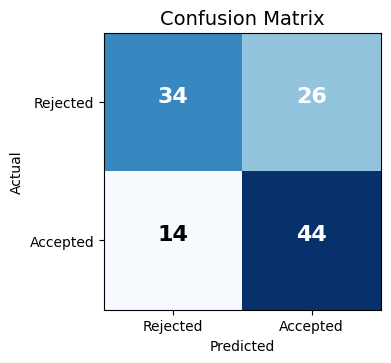


--- Regularized Logistic Regression Metrics ---
Accuracy:        0.6610
Precision:       0.6286
Recall:          0.7586
F1 Score:        0.6875


In [35]:
# Code segment no. 28B (enhanced metrics for regularized logistic regression)
from sklearn.metrics import confusion_matrix

# Get predictions from both your custom model and scikit-learn model
theta_min = np.matrix(result2[0])
# custom_predictions = predict(theta_min, X2)
pred = model.predict(X2)
sklearn_proba = model.predict_proba(X2)[:, 1]

# Convert to numpy arrays for easier handling
y_true = y2.flatten()
# custom_pred = np.array(custom_predictions)

# calculate metrics for sklearn model
TP = np.sum((y_true == 1) & (pred == 1))
TN = np.sum((y_true == 0) & (pred == 0))
FP = np.sum((y_true == 0) & (pred == 1))
FN = np.sum((y_true == 1) & (pred == 0))

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

# Create confusion matrix
cm = confusion_matrix(y_true, pred)

# Create visualization with multiple subplots
fig, axes = plt.subplots(1, 1, figsize=(4, 4))

# Plot 1: Confusion Matrix
axes.imshow(cm, cmap=plt.cm.Blues)
axes.set_title('Confusion Matrix', fontsize=14)
tick_marks = [0, 1]
axes.set_xticks(tick_marks)
axes.set_xticklabels(['Rejected', 'Accepted'])
axes.set_yticks(tick_marks)
axes.set_yticklabels(['Rejected', 'Accepted'])
axes.set_xlabel('Predicted')
axes.set_ylabel('Actual')

# Add text annotations to confusion matrix
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        axes.text(j, i, format(cm[i, j], 'd'),
                horizontalalignment="center", fontsize=16, fontweight='bold',
                color="white" if cm[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Print comparison of metrics
print("\n--- Regularized Logistic Regression Metrics ---")
print(f"Accuracy:        {model.score(X2, y2):.4f}")
print(f"Precision:       {TP/(TP+FP):.4f}")
print(f"Recall:          {TP/(TP+FN):.4f}")
print(f"F1 Score:        {2*precision*recall/(precision+recall) if (precision+recall) > 0 else 0:.4f}")

Number of features in model: 11
Number of features expected: 10
Shape of model.coef_: (1, 11)
=== Coefficients of Scikit-Learn Regularized Logistic Regression Model ===


,Feature,Coefficient
0,Intercept,0.523592
1,F10,0.005784
2,F20,0.291145
3,F21,-1.602295
4,F30,-0.586700
5,F31,0.013411
6,F32,-0.213956
7,F40,-0.394635
8,F41,-1.374219
9,F42,0.021425



=== Scikit-Learn Regularized Logistic Regression Formula ===


<IPython.core.display.Math object>

where:


<IPython.core.display.Math object>


=== Feature Descriptions ===
F10: Test1^1 × Test2^0
F20: Test1^2 × Test2^0
F21: Test1^1 × Test2^1
F30: Test1^3 × Test2^0
F31: Test1^2 × Test2^1
F32: Test1^1 × Test2^2
F40: Test1^4 × Test2^0
F41: Test1^3 × Test2^1
F42: Test1^2 × Test2^2
F43: Test1^1 × Test2^3

=== Scikit-Learn Regularization Information ===
• Regularization type: L2 (Ridge)
• C parameter: 1.0 (inverse of regularization strength)
• Smaller C values specify stronger regularization


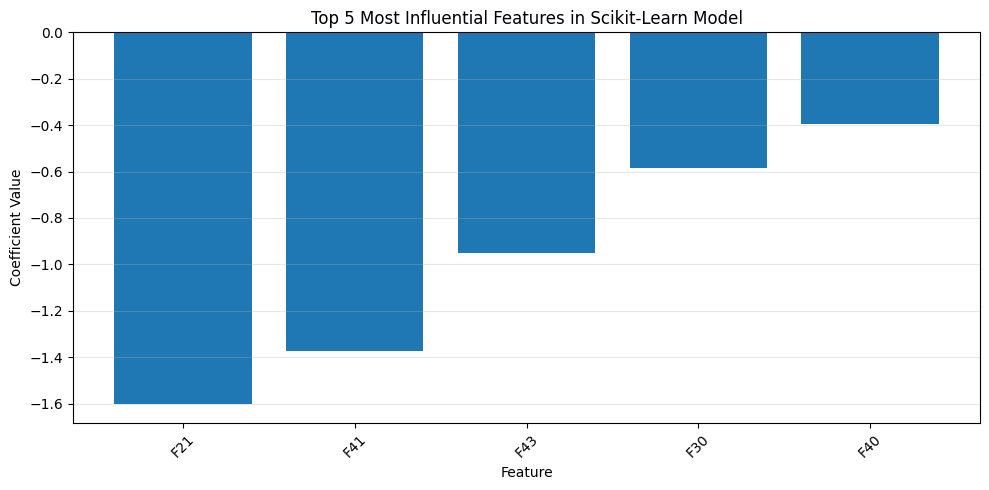


=== Logit Form of Scikit-Learn Model ===


<IPython.core.display.Math object>

In [38]:
# Code segment no. 28D (Display coefficients and formula for scikit-learn model only - FIXED)
import pandas as pd
from IPython.display import display, Math, Latex

# Get coefficients from scikit-learn model
theta_sklearn = np.concatenate([model.intercept_, model.coef_[0]])

# First verify dimensions to ensure proper DataFrame creation
print(f"Number of features in model: {len(theta_sklearn)-1}")  # -1 for intercept
print(f"Number of features expected: {sum(range(1, degree))}")
print(f"Shape of model.coef_: {model.coef_.shape}")

# Get the correct number of features
actual_features = ['Intercept']
for i in range(1, degree):
    for j in range(0, i):
        actual_features.append(f'F{i}{j}')

# Ensure we have the right number of feature names
if len(actual_features) != len(theta_sklearn):
    print(f"WARNING: Feature count mismatch. Adjusting feature list to match coefficient count.")
    # If needed, trim or extend feature list to match coefficients
    if len(actual_features) > len(theta_sklearn):
        actual_features = actual_features[:len(theta_sklearn)]
    else:
        # Add generic feature names if needed
        while len(actual_features) < len(theta_sklearn):
            actual_features.append(f'Feature_{len(actual_features)}')

# Create DataFrame to display coefficients - with length check
coefficients_df = pd.DataFrame({
    'Feature': actual_features,
    'Coefficient': theta_sklearn
})

# Display the coefficients table
print("=== Coefficients of Scikit-Learn Regularized Logistic Regression Model ===")
display(coefficients_df)

# Create the full formula representation
formula = r"P(\text{Accepted}) = \frac{1}{1 + e^{-z}}"
z_formula = r"z = " + f"{theta_sklearn[0]:.4f}"

# Fix the backslash issue - use raw strings for LaTeX and escape sequences correctly
# Add each feature term to the formula
feature_names = [name for name in actual_features if name != 'Intercept']
for i, feature in enumerate(feature_names):
    coef = theta_sklearn[i+1]
    if coef >= 0:
        z_formula += f" + {coef:.4f} " + r"\cdot " + f"{feature}"
    else:
        z_formula += f" - {abs(coef):.4f} " + r"\cdot " + f"{feature}"

# Print the full formula
print("\n=== Scikit-Learn Regularized Logistic Regression Formula ===")
display(Math(formula))
print("where:")
display(Math(z_formula))

# Explain feature meanings
print("\n=== Feature Descriptions ===")
feature_descriptions = []
for i in range(1, degree):
    for j in range(0, i):
        feature_descriptions.append(
            f"F{i}{j}: Test1^{i-j} × Test2^{j}"
        )
for desc in feature_descriptions:
    print(desc)

# Explain scikit-learn's regularization approach
print("\n=== Scikit-Learn Regularization Information ===")
print(f"• Regularization type: L2 (Ridge)")
print(f"• C parameter: {1.0} (inverse of regularization strength)")
print(f"• Smaller C values specify stronger regularization")

# Visualize the most important terms in the model
plt.figure(figsize=(10, 5))
# Get top coefficients (excluding intercept)
coef_abs = np.abs(theta_sklearn[1:])
sorted_indices = np.argsort(coef_abs)[::-1]  # Sort by absolute value, descending
num_to_show = min(5, len(sorted_indices))
top_features = [feature_names[i] for i in sorted_indices[:num_to_show]]
top_coefs = theta_sklearn[1:][sorted_indices[:num_to_show]]

plt.bar(top_features, top_coefs)
plt.title('Top 5 Most Influential Features in Scikit-Learn Model')
plt.xlabel('Feature')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# Display the logit form of the model - fix the backslash issue
print("\n=== Logit Form of Scikit-Learn Model ===")
logit_formula = r"\log\left[\frac{P(\text{Accepted})}{1-P(\text{Accepted})}\right] = " + f"{theta_sklearn[0]:.4f}"
for i, feature in enumerate(feature_names):
    coef = theta_sklearn[i+1]
    if coef >= 0:
        logit_formula += f" + {coef:.4f} " + r"\cdot " + f"{feature}"
    else:
        logit_formula += f" - {abs(coef):.4f} " + r"\cdot " + f"{feature}"
display(Math(logit_formula))